In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [8]:
df= pd.read_csv("fcc-forum-pageviews.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index('date')


In [9]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [10]:
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]


In [11]:
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [ ]:
#graph

<AxesSubplot:xlabel='date'>

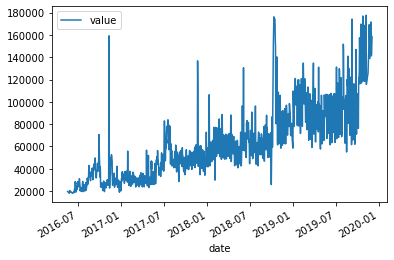

In [12]:
df.plot()

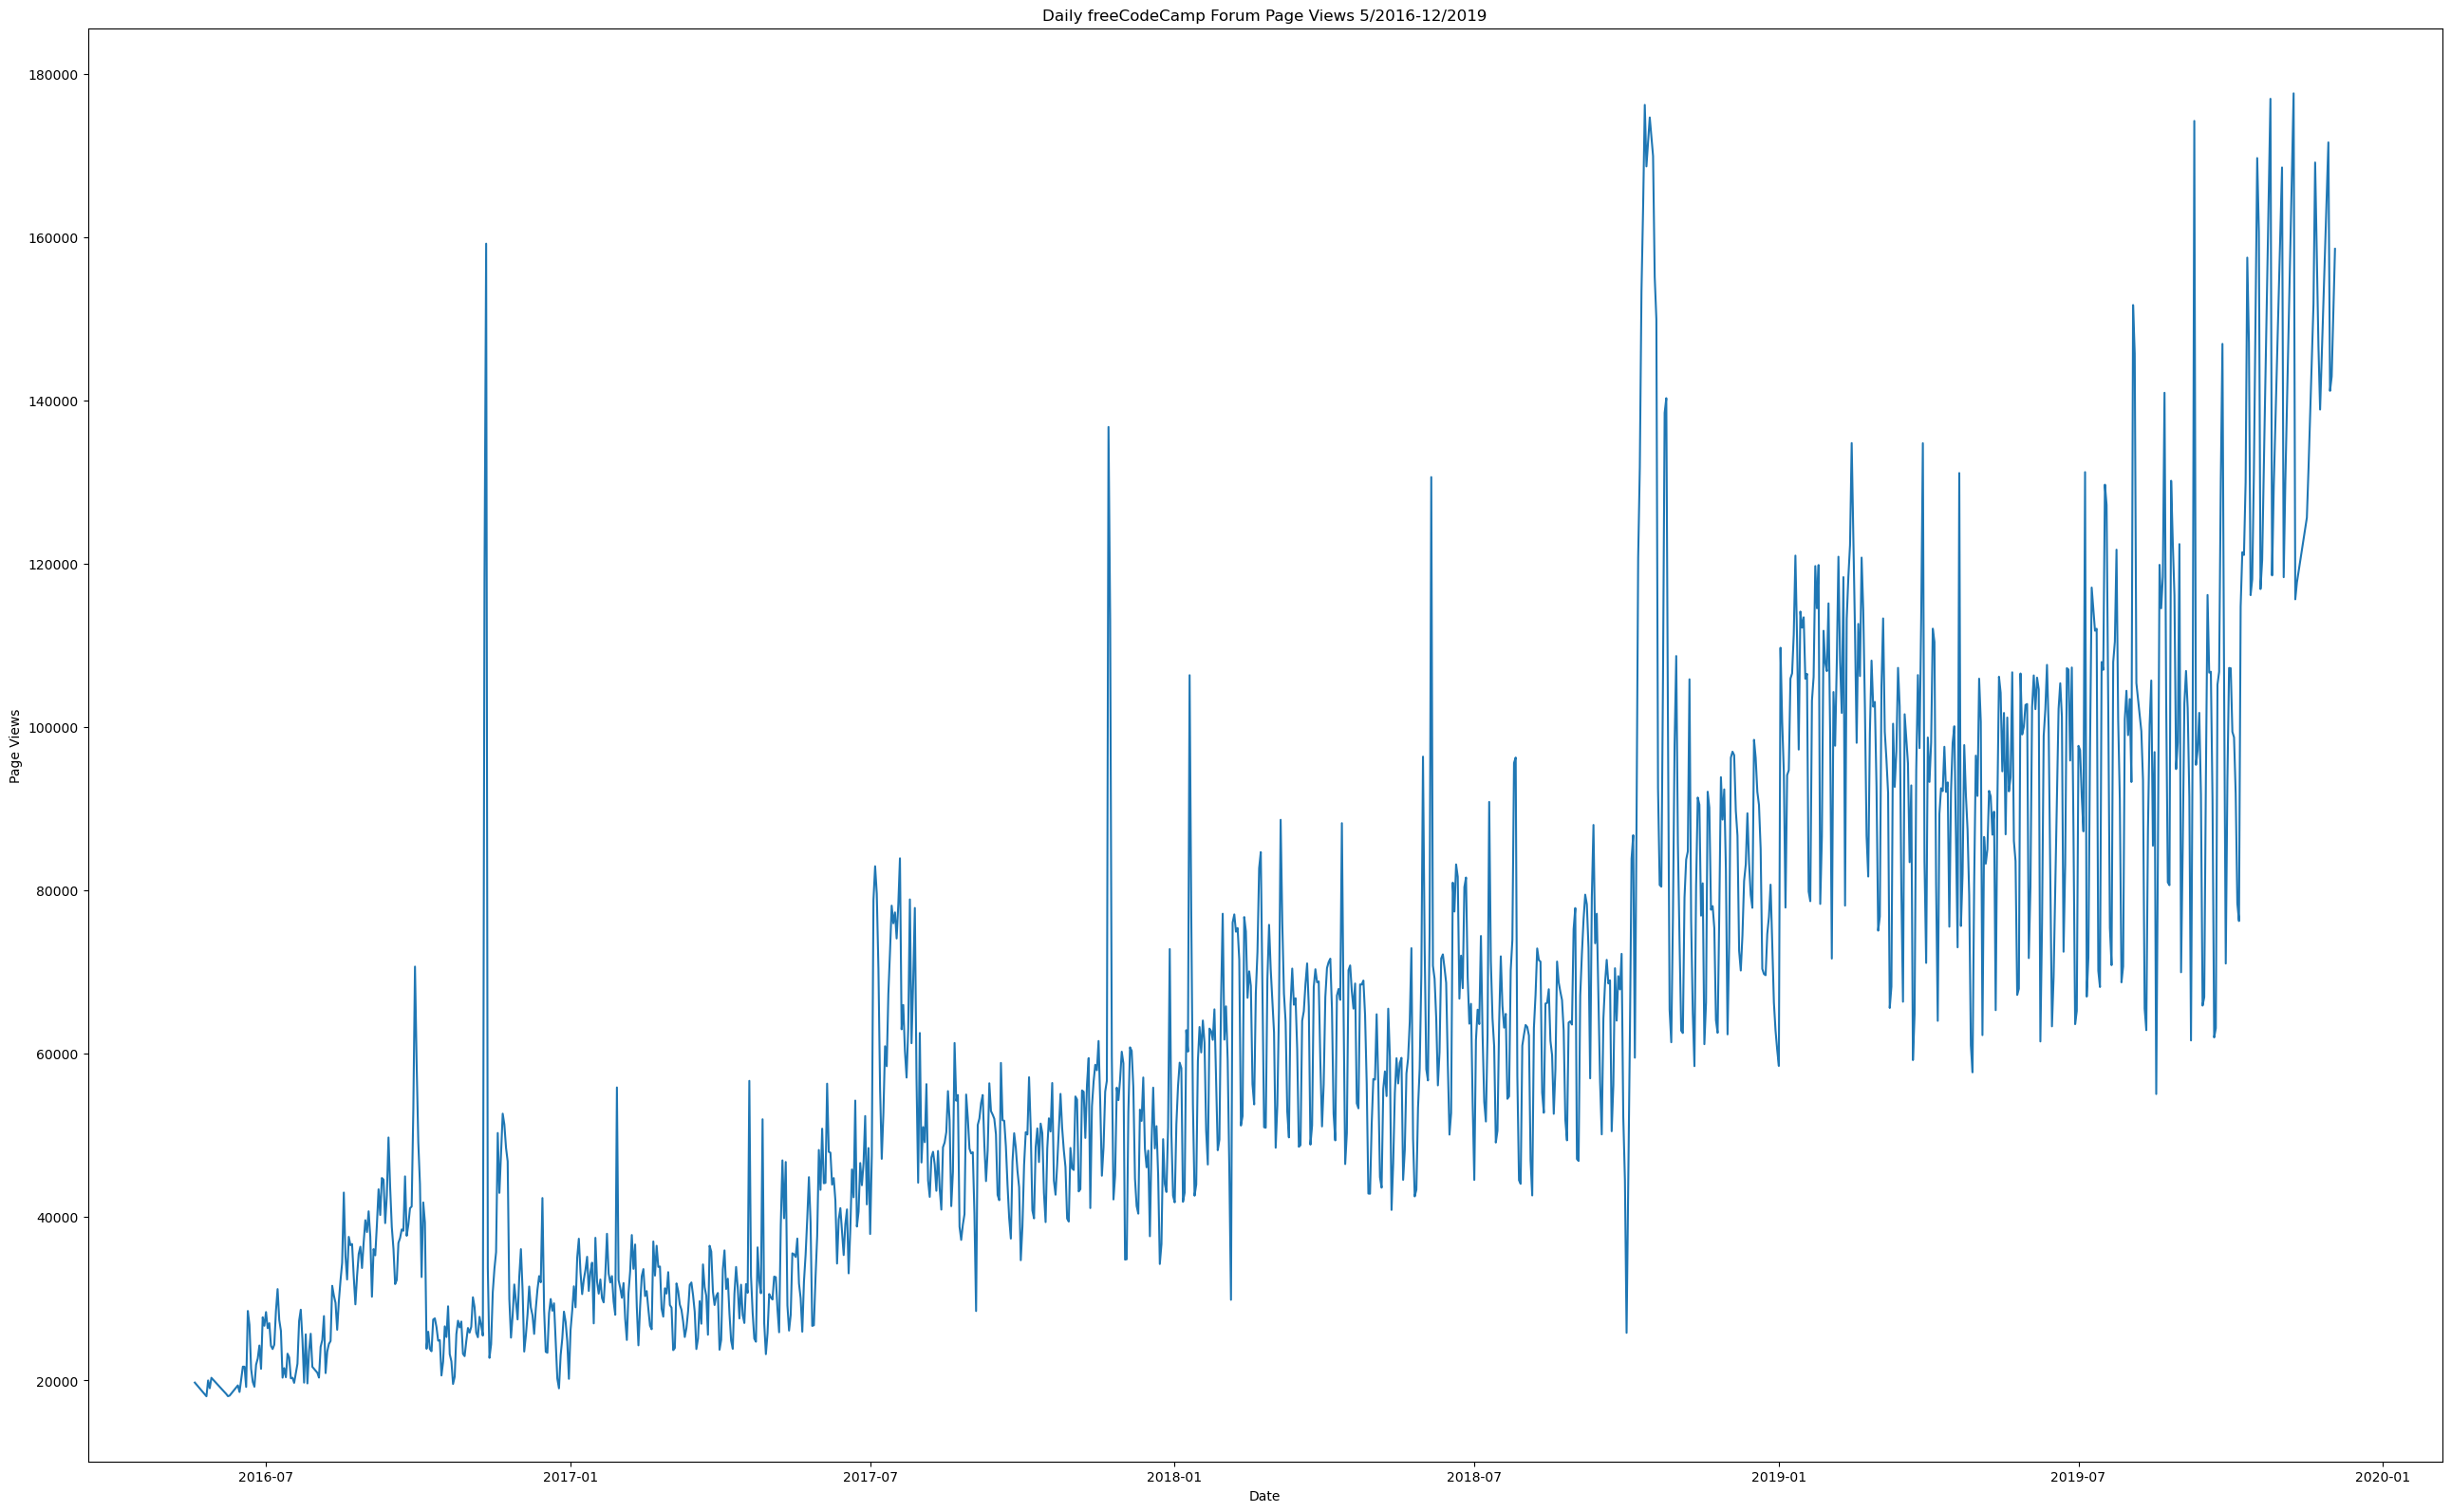

In [19]:

    # Draw line plot
fig, ax = plt.subplots(figsize=(32, 20), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
ax.set_xlabel("Date")
ax.set_ylabel("Page Views")
sns.lineplot(data=df, legend=False)

    # Save image and return fig (don't change this part)
fig.savefig('line_plot.png')


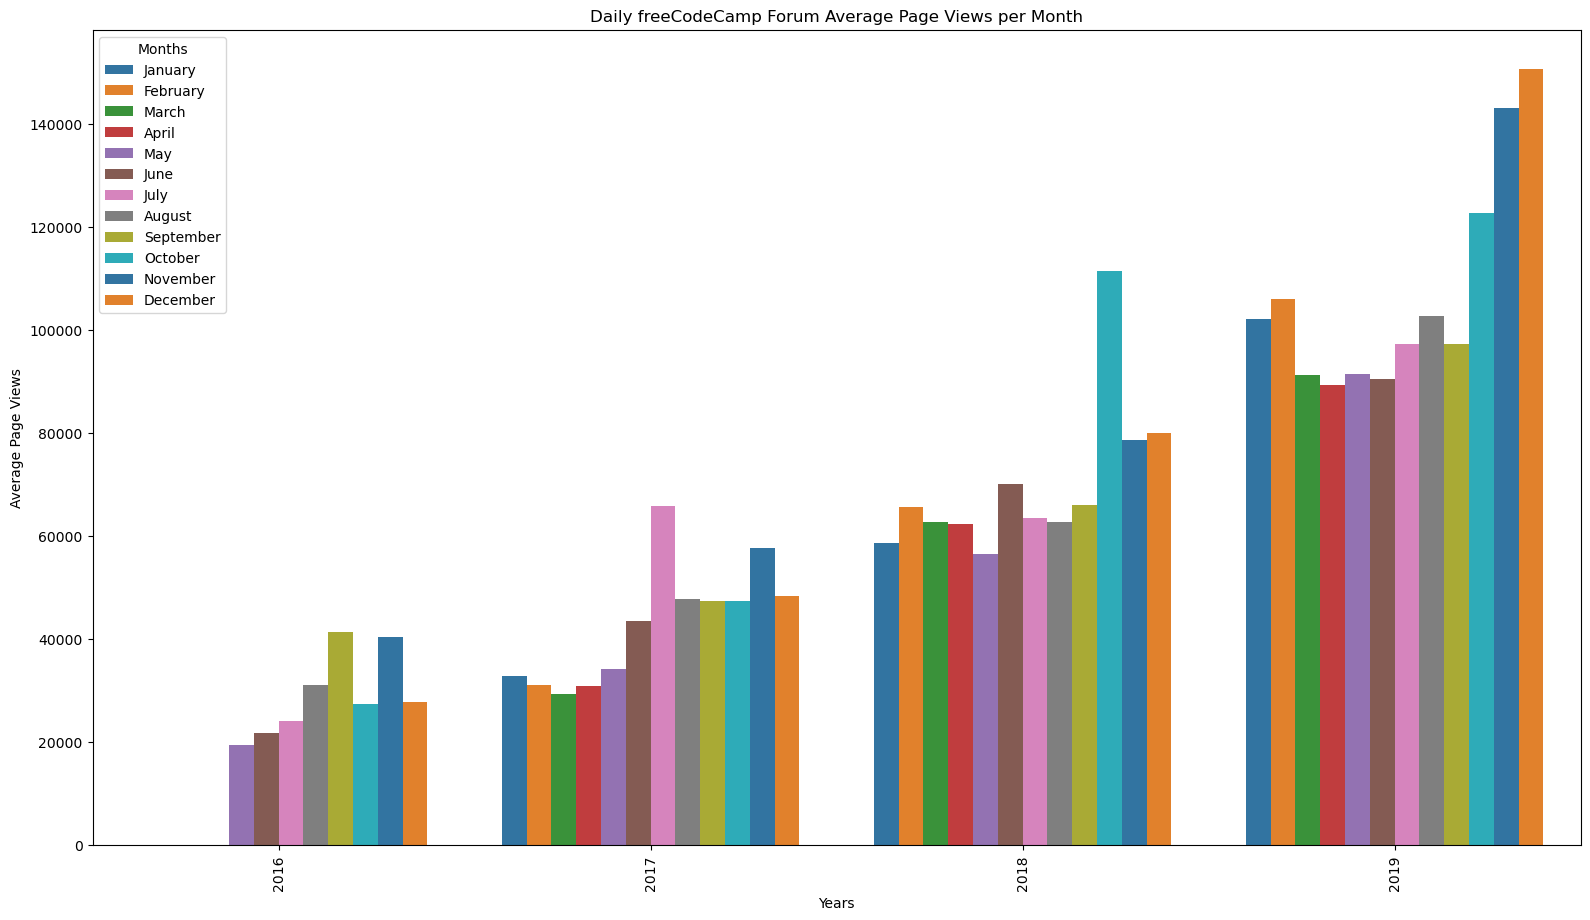

In [24]:

# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar["Years"] = df_bar.index.year
df_bar["Months"] = df_bar.index.month_name()
df_bar = pd.DataFrame(df_bar.groupby(["Years", "Months"], sort=False)["value"].mean().round().astype(int))
df_bar = df_bar.rename(columns={"value": "Average Page Views"})
df_bar = df_bar.reset_index()
missing_data = {
        "Years": [2016, 2016, 2016, 2016],
        "Months": ['January', 'February', 'March', 'April'],
        "Average Page Views": [0, 0, 0, 0]
    }

df_bar = pd.concat([pd.DataFrame(missing_data), df_bar])

    # Draw bar plot
fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=100)
ax.set_title("Daily freeCodeCamp Forum Average Page Views per Month")

chart = sns.barplot(data=df_bar, x="Years", y="Average Page Views", hue="Months", palette="tab10")
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='center')

    # Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')


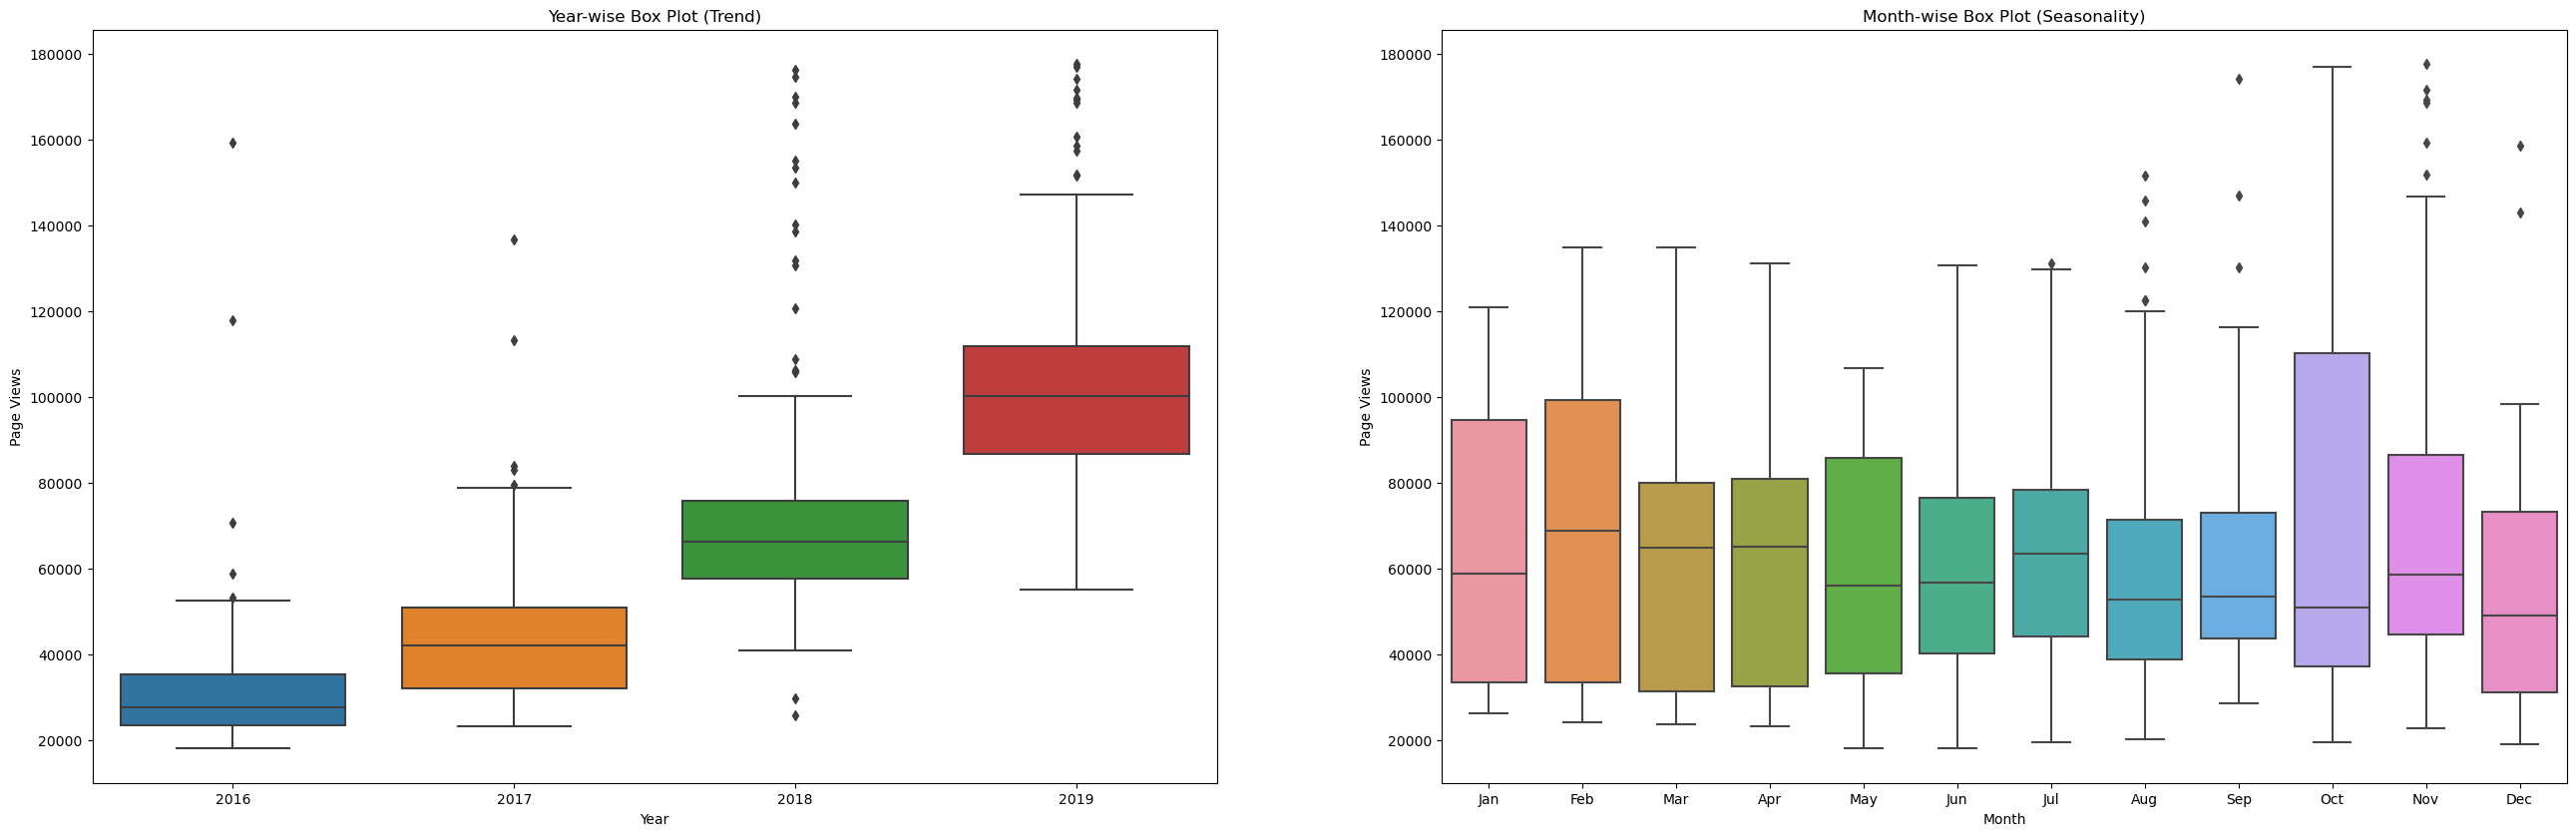

In [25]:

# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
fig, axes = plt.subplots(1, 2, figsize=(32, 10), dpi=100)
    
    # Yearly boxplot
sns.boxplot(data=df_box, x="year", y="value", ax=axes[0])
axes[0].set_title("Year-wise Box Plot (Trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")
    
    # Monthly boxplot
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
sns.boxplot(data=df_box, x="month", y="value", order=month_order, ax=axes[1])
axes[1].set_title("Month-wise Box Plot (Seasonality)")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Page Views")

    # Save image and return fig (don't change this part)
fig.savefig('box_plot.png')
   